In [1]:
# import package
import numpy as np
import pandas as pd

import os

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir('D:/University/NĂM 3/Kì 6/Basic Data Analysis/Project/Data and analyze/Data'))

['car_insurance_claim.csv']


In [3]:
df = pd.read_csv('D:/University/NĂM 3/Kì 6/Basic Data Analysis/Project/Data and analyze/Data/car_insurance_claim.csv')

In [4]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


Link giải thích: 

http://rstudio-pubs-static.s3.amazonaws.com/383423_f41b46425643441eb5050bc8fb544d74.html

https://github.com/xzhangfox/Prediction-of-Car-Insurance-Claims

In [5]:
df.drop('BIRTH', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [7]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY'],
      dtype='object')

First of all, we need to change the wrong format in some columns to make it consistent.

In [8]:
df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '').astype(float)
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '').astype(float)
df['OLDCLAIM'] = df['OLDCLAIM'].str.replace('$', '').str.replace(',', '').astype(float)
df['CLM_AMT'] = df['CLM_AMT'].str.replace('$', '').str.replace(',', '').astype(float)
df['GENDER'] = df['GENDER'].str.replace('z_', '')
df['MSTATUS'] = df['MSTATUS'].str.replace('z_', '')
df['EDUCATION'] = df['EDUCATION'].str.replace('z_','').str.replace('<','')
df['OCCUPATION'] = df['OCCUPATION'].str.replace('z_','')
df['BLUEBOOK'] = df['BLUEBOOK'].str.replace('$','').str.replace(',','').astype(int) 
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace('z_','')
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace('z_','')
df['URBANICITY'] = df['URBANICITY'].str.replace('Highly Urban/ ','').str.replace('z_Highly Rural/ ','')

## Drop duplicate

To drop duplicate, we need to check the duplicate in all columns (except ID) and we remove some rows has the same value.

In [9]:
subsets = []
for i in df.columns:
    if i != 'ID':
        subsets.append(i)

print('Number of rows before drop duplicate: %s' %len(df))
df.drop_duplicates(subset=subsets, keep=False)
print('number of rows after drop duplicate: %s' %len(df))


Number of rows before drop duplicate: 10302
number of rows after drop duplicate: 10302


Don't have any row in this dataset in duplicate

## Check dtypes of column

Create 2 list include 2 type of each column has (numeric and category)

In [10]:
numeric = []
category = []

for i in df.columns:
    if df[i].dtypes == 'object':
        category.append(i)
    else:
        numeric.append(i)

print(category)
print(numeric)

['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG']


Next, we need to find which column just has 2 unique values. It will make us use the methods after in one-hot coding and create dummy.

We will create dummy for columns just has 2 unique values and which column has 3 or more unique value will create by one-hot encoding.

In [11]:
# Check in category
category_2val = []
for i in category: 
    if len(df[i].unique()) == 2:
        category_2val.append(i)

category_2val

['PARENT1', 'MSTATUS', 'GENDER', 'CAR_USE', 'RED_CAR', 'REVOKED', 'URBANICITY']

In [12]:
df

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,60.0,0,11.0,67349.0,No,0.0,No,M,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Urban
1,132761049,0,43.0,0,11.0,91449.0,No,257252.0,No,M,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Urban
2,921317019,0,48.0,0,11.0,52881.0,No,0.0,No,M,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Urban
3,727598473,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,...,SUV,no,38690.0,2,No,3,0.0,10.0,0,Urban
4,450221861,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,67790126,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,...,Minivan,no,0.0,0,No,2,0.0,17.0,0,Urban
10298,61970712,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,...,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Urban
10299,849208064,0,48.0,0,15.0,39837.0,No,170611.0,Yes,F,...,SUV,no,0.0,0,No,0,0.0,1.0,0,Urban
10300,627828331,0,50.0,0,7.0,43445.0,No,149248.0,Yes,F,...,Minivan,no,0.0,0,No,0,0.0,11.0,0,Urban


In [13]:
df['PARENT1'] = df['PARENT1'].map({'No':0, 'Yes':1}).astype(int)
df['MSTATUS'] = df['MSTATUS'].map({'No':0, 'Yes':1}).astype(int)
df['GENDER'] = df['GENDER'].map({'M':1, 'F':0}).astype(int)
df['CAR_USE'] = df['CAR_USE'].map({'Private':1, 'Commercial':0}).astype(int)
df['RED_CAR'] = df['RED_CAR'].map({'no':0, 'yes':1}).astype(int)
df['REVOKED'] = df['REVOKED'].map({'No':0, 'Yes':1}).astype(int)
df['URBANICITY'] = df['URBANICITY'].map({'Urban':1, 'Rural':0}).astype(int)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  int32  
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  int32  
 9   GENDER      10302 non-null  int32  
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  int32  
 14  BLUEBOOK    10302 non-null  int32  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  int32  
 18  OLDCLAIM    10302 non-null  float64
 19  CLM_FREQ    10302 non-nul

In [15]:
df[df['INCOME'] == 0]

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
18,588888550,0,45.0,0,0.0,0.0,0,106859.0,1,0,...,SUV,0,0.0,0,0,3,2920.0,5.0,1,1
28,254362485,2,44.0,2,0.0,0.0,0,82344.0,1,0,...,SUV,0,3338.0,3,0,0,0.0,11.0,0,1
42,364483168,0,56.0,0,0.0,0.0,0,63827.0,1,0,...,Minivan,0,0.0,0,0,0,0.0,12.0,0,0
48,70821537,0,52.0,0,0.0,0.0,0,87925.0,0,0,...,SUV,0,0.0,0,0,1,0.0,6.0,0,0
87,421217157,0,48.0,0,0.0,0.0,0,98920.0,1,0,...,Sports Car,0,8363.0,2,0,3,0.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,224170926,0,41.0,3,0.0,0.0,0,0.0,1,0,...,SUV,0,2633.0,2,0,5,0.0,5.0,0,0
10210,798630672,0,35.0,0,0.0,0.0,0,88575.0,0,0,...,SUV,0,21099.0,3,1,1,0.0,9.0,0,0
10217,384021681,0,45.0,3,0.0,0.0,0,65359.0,1,0,...,SUV,0,0.0,0,0,1,4858.0,1.0,1,0
10264,903596056,0,43.0,0,NaN,0.0,0,55203.0,1,0,...,Minivan,0,3035.0,4,0,0,471.0,14.0,1,1


## Handle missing values

Find the column has missing values and calculate the percentage of missing values in this columns

Next we will fill the missing values by __KNN imputation__ methods. We use this method because in some papers (we will attach later) they said that the KNN imputation is better than the mean/median methods and they had proven through some dataset for clarify their assumption.

In [16]:
# Check null
def missing_value_table(df):

    # create missing column
    missing_value = df.isna().sum()

    # create percentage missing column
    percentage_missing = 100 * df.isna().sum() / len(df)

    # concat 2 columns
    table_1 = pd.concat([missing_value,percentage_missing], axis=1)

    # rename 2 columns
    table_2 = table_1.rename(columns={0:'Missing Value', 1:'Percentage of Missing'})

    # sort the missing value by descending
    table_3 = table_2[table_2.iloc[:,1] != 0].sort_values('Percentage of Missing', ascending=False).round(1)

    # Print some sentence
    print('These dataframe has', str(df.shape[1]), 'columns')
    print('These dataframe has', str(table_3.shape[0]), 'columns which has null values')

    return(table_3)

In [17]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 6 columns which has null values


,Missing Value,Percentage of Missing
OCCUPATION,665,6.5
CAR_AGE,639,6.2
HOME_VAL,575,5.6
INCOME,570,5.5
YOJ,548,5.3
AGE,7,0.1



Because the occupation is the category columns so we fill the missing values my add the value has the most frequent happen in this column __(MODE)__


In [18]:
df.loc[:,'OCCUPATION']

0        Professional
1         Blue Collar
2             Manager
3            Clerical
4         Blue Collar
             ...     
10297         Manager
10298             NaN
10299     Blue Collar
10300      Home Maker
10301        Clerical
Name: OCCUPATION, Length: 10302, dtype: object

In [19]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

In [20]:
df['OCCUPATION'].isna().sum()

0

In [21]:
# Check again
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 5 columns which has null values


,Missing Value,Percentage of Missing
CAR_AGE,639,6.2
HOME_VAL,575,5.6
INCOME,570,5.5
YOJ,548,5.3
AGE,7,0.1


In [22]:
# Check the correlation
correlation_1 = df[subsets].corr()


<AxesSubplot:>

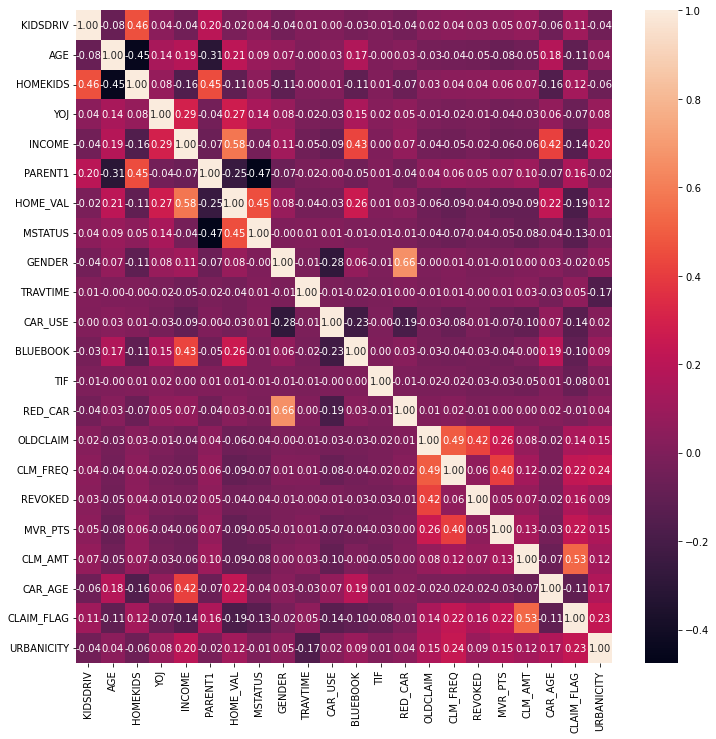

In [23]:
plt.figure(figsize=(12,12))

sns.heatmap(correlation_1, annot=True, fmt=".2f")

In [24]:
from sklearn.impute import KNNImputer

In [25]:
df_try_1 = df[subsets].copy()
df_try_1

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,PhD,...,Minivan,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,High School,...,Minivan,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,Bachelors,...,Van,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,High School,...,SUV,0,38690.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,High School,...,Minivan,1,0.0,0,0,0,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.0,0,386273.0,1,1,PhD,...,Minivan,0,0.0,0,0,2,0.0,17.0,0,1
10298,0,46.0,0,9.0,107204.0,0,332591.0,1,1,Masters,...,Panel Truck,0,0.0,0,0,0,0.0,1.0,0,1
10299,0,48.0,0,15.0,39837.0,0,170611.0,1,0,High School,...,SUV,0,0.0,0,0,0,0.0,1.0,0,1
10300,0,50.0,0,7.0,43445.0,0,149248.0,1,0,Bachelors,...,Minivan,0,0.0,0,0,0,0.0,11.0,0,1


In [26]:
df_knn = df.filter(subsets, axis=1).copy()
df_knn.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,PhD,...,Minivan,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,High School,...,Minivan,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,Bachelors,...,Van,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,High School,...,SUV,0,38690.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,High School,...,Minivan,1,0.0,0,0,0,0.0,6.0,0,1


In [27]:
# Using one-hot encoding to change the value of 3 columns has 3 or more unique values
for i in ['EDUCATION', 'CAR_TYPE','OCCUPATION']:
    onehots = pd.get_dummies(df_knn[i],prefix=i)
    df_knn=df_knn.join(onehots)

df_knn.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,PhD,...,0,0,0,0,0,0,0,0,1,0
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,High School,...,0,0,1,0,0,0,0,0,0,0
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,Bachelors,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,High School,...,0,0,0,1,0,0,0,0,0,0
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,High School,...,0,0,1,0,0,0,0,0,0,0


In [28]:
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 10302 non-null  int64  
 1   AGE                      10295 non-null  float64
 2   HOMEKIDS                 10302 non-null  int64  
 3   YOJ                      9754 non-null   float64
 4   INCOME                   9732 non-null   float64
 5   PARENT1                  10302 non-null  int32  
 6   HOME_VAL                 9727 non-null   float64
 7   MSTATUS                  10302 non-null  int32  
 8   GENDER                   10302 non-null  int32  
 9   EDUCATION                10302 non-null  object 
 10  OCCUPATION               10302 non-null  object 
 11  TRAVTIME                 10302 non-null  int64  
 12  CAR_USE                  10302 non-null  int32  
 13  BLUEBOOK                 10302 non-null  int32  
 14  TIF                   

In [29]:
df_knn.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,PhD,...,0,0,0,0,0,0,0,0,1,0
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,High School,...,0,0,1,0,0,0,0,0,0,0
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,Bachelors,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,High School,...,0,0,0,1,0,0,0,0,0,0
4,0,51.0,0,14.0,NaN,0,306251.0,1,1,High School,...,0,0,1,0,0,0,0,0,0,0


In [30]:
df_knn = df_knn.drop(columns=['EDUCATION', 'CAR_TYPE','OCCUPATION']).copy()
df_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 10302 non-null  int64  
 1   AGE                      10295 non-null  float64
 2   HOMEKIDS                 10302 non-null  int64  
 3   YOJ                      9754 non-null   float64
 4   INCOME                   9732 non-null   float64
 5   PARENT1                  10302 non-null  int32  
 6   HOME_VAL                 9727 non-null   float64
 7   MSTATUS                  10302 non-null  int32  
 8   GENDER                   10302 non-null  int32  
 9   TRAVTIME                 10302 non-null  int64  
 10  CAR_USE                  10302 non-null  int32  
 11  BLUEBOOK                 10302 non-null  int32  
 12  TIF                      10302 non-null  int64  
 13  RED_CAR                  10302 non-null  int32  
 14  OLDCLAIM              

In [31]:
impute = KNNImputer(n_neighbors=10, weights='distance')
df_knn_imputed = pd.DataFrame(impute.fit_transform(df_knn), columns=df_knn.columns)
df_knn_imputed

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,TRAVTIME,...,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0.0,60.0,0.0,11.0,67349.00000,0.0,0.0,0.0,1.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,43.0,0.0,11.0,91449.00000,0.0,257252.0,0.0,1.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,48.0,0.0,11.0,52881.00000,0.0,0.0,0.0,1.0,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,35.0,1.0,10.0,16039.00000,0.0,124191.0,1.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,51.0,0.0,14.0,57608.24609,0.0,306251.0,1.0,1.0,32.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1.0,45.0,2.0,9.0,164669.00000,0.0,386273.0,1.0,1.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10298,0.0,46.0,0.0,9.0,107204.00000,0.0,332591.0,1.0,1.0,36.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10299,0.0,48.0,0.0,15.0,39837.00000,0.0,170611.0,1.0,0.0,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10300,0.0,50.0,0.0,7.0,43445.00000,0.0,149248.0,1.0,0.0,36.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [32]:
missing_value_table(df_knn_imputed)

These dataframe has 40 columns
These dataframe has 0 columns which has null values


,Missing Value,Percentage of Missing


In [33]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 5 columns which has null values


,Missing Value,Percentage of Missing
CAR_AGE,639,6.2
HOME_VAL,575,5.6
INCOME,570,5.5
YOJ,548,5.3
AGE,7,0.1


In [34]:
# Impute to the df dataset
df['CAR_AGE'] = df_knn_imputed['CAR_AGE']
df['HOME_VAL'] = df_knn_imputed['HOME_VAL']
df['INCOME'] = df_knn_imputed['INCOME']
df['YOJ'] = df_knn_imputed['YOJ']
df['AGE'] = df_knn_imputed['AGE']

In [35]:
missing_value_table(df)

These dataframe has 26 columns
These dataframe has 0 columns which has null values


,Missing Value,Percentage of Missing


## Handling with outliers

In this dataset, we use the 3 concepts to determine outliers (and now we need to clarify which ways is better for this situation)

1. Distribution (z-score > 3 or z-score < 3)

2. Isolation Tree

3. Local Outlier Factor

In [36]:
df_outlier = df_knn_imputed[['AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']]
df_outlier

,AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM,CLM_AMT
0,60.0,67349.00000,0.0,14230.0,4461.0,0.0
1,43.0,91449.00000,257252.0,14940.0,0.0,0.0
2,48.0,52881.00000,0.0,21970.0,0.0,0.0
3,35.0,16039.00000,124191.0,4010.0,38690.0,0.0
4,51.0,57608.24609,306251.0,15440.0,0.0,0.0
...,...,...,...,...,...,...
10297,45.0,164669.00000,386273.0,13270.0,0.0,0.0
10298,46.0,107204.00000,332591.0,24490.0,0.0,0.0
10299,48.0,39837.00000,170611.0,13820.0,0.0,0.0
10300,50.0,43445.00000,149248.0,22550.0,0.0,0.0


In [37]:
df['ID']

0         63581743
1        132761049
2        921317019
3        727598473
4        450221861
           ...    
10297     67790126
10298     61970712
10299    849208064
10300    627828331
10301    680381960
Name: ID, Length: 10302, dtype: int64

In [38]:
from sklearn.ensemble import IsolationForest

# Initiate isolation forest
isolation = IsolationForest(n_estimators=100, 
                            contamination='auto', 
                            max_features=df_outlier.shape[1])

# Count observation

# Fit and predict
isolation.fit(df_outlier)
outliers_predicted = isolation.predict(df_outlier)

# Address outliers in a new column
df_outlier['outlier'] = outliers_predicted

In [39]:
df_outlier['outlier'].value_counts()

 1    8932
-1    1370
Name: outlier, dtype: int64

In [65]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

# Initiate LOF
lof = LocalOutlierFactor(n_neighbors=10, contamination='auto')

# Transform data
df_outlier_x = np.array(df_outlier).astype('float')

# Initiate scaler and scale data
scaler = MinMaxScaler()
df_outlier_scaled = scaler.fit_transform(df_outlier)

# Fit and predict on scaled data
outliers_predicted_1 = lof.fit_predict(df_outlier)

# Address outliers in a new column
df_outlier['outlier_1'] = outliers_predicted_1

In [66]:
df_outlier['outlier_1'].value_counts()

 1    9943
-1     359
Name: outlier_1, dtype: int64

In [67]:
df_outlier.head(30)

,AGE,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM,CLM_AMT,outlier,outlier_1
0,60.0,67349.000000,0.000000,14230.0,4461.0,0.0,1,1
1,43.0,91449.000000,257252.000000,14940.0,0.0,0.0,1,1
2,48.0,52881.000000,0.000000,21970.0,0.0,0.0,1,1
3,35.0,16039.000000,124191.000000,4010.0,38690.0,0.0,-1,1
4,51.0,57608.246090,306251.000000,15440.0,0.0,0.0,1,1
5,50.0,114986.000000,243925.000000,18000.0,19217.0,0.0,1,-1
6,34.0,125301.000000,0.000000,17430.0,0.0,2946.0,1,1
7,54.0,18755.000000,134211.499157,8780.0,0.0,0.0,1,1
8,40.0,50815.000000,0.000000,18930.0,3295.0,6477.0,1,1
9,44.0,43486.000000,0.000000,5900.0,0.0,0.0,1,1


In [68]:
# Delete instances (rows) which are outliers
from scipy import stats
print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array ([True] * len(df)) # Nhân giá trị True với số lần = độ dài df2 và để trong array

for col in ['AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df[filtered_entries]
print("Number of rows after filtering outliers:",len(df2))

Number of rows before filtering outliers: 10302
Number of rows after filtering outliers: 10154


## Check the distribution

Họp ngày 2/5/2023

Phân tích thêm các biến

1. Travtime - time to work + claim_flag + car_use (sử dụng phương tiện cá nhân thì có xu hướng gặp tai nạn xe cao hơn hay không)

2. Car Age, loại xe => xu hướng gặp tai nạn, xe càng cũ thì càng dễ gặp tai nạn hơn => gây ra là khách hàng có xu hướng sử dụng hơn

3. Thu nhập và giá trị nhà ở (Home Value) => có xu hướng gặp tai nạn cao hơn hay không 

4. OldClaim - số lần mà người đó đã từng gặp tai nạn trong 5 năm

5. Urbanicity - ở đâu gặp tai nạn nhiều hơn

6. Gender - nữ, nam thì có xu hướng gặp tai nạn cao hơn.

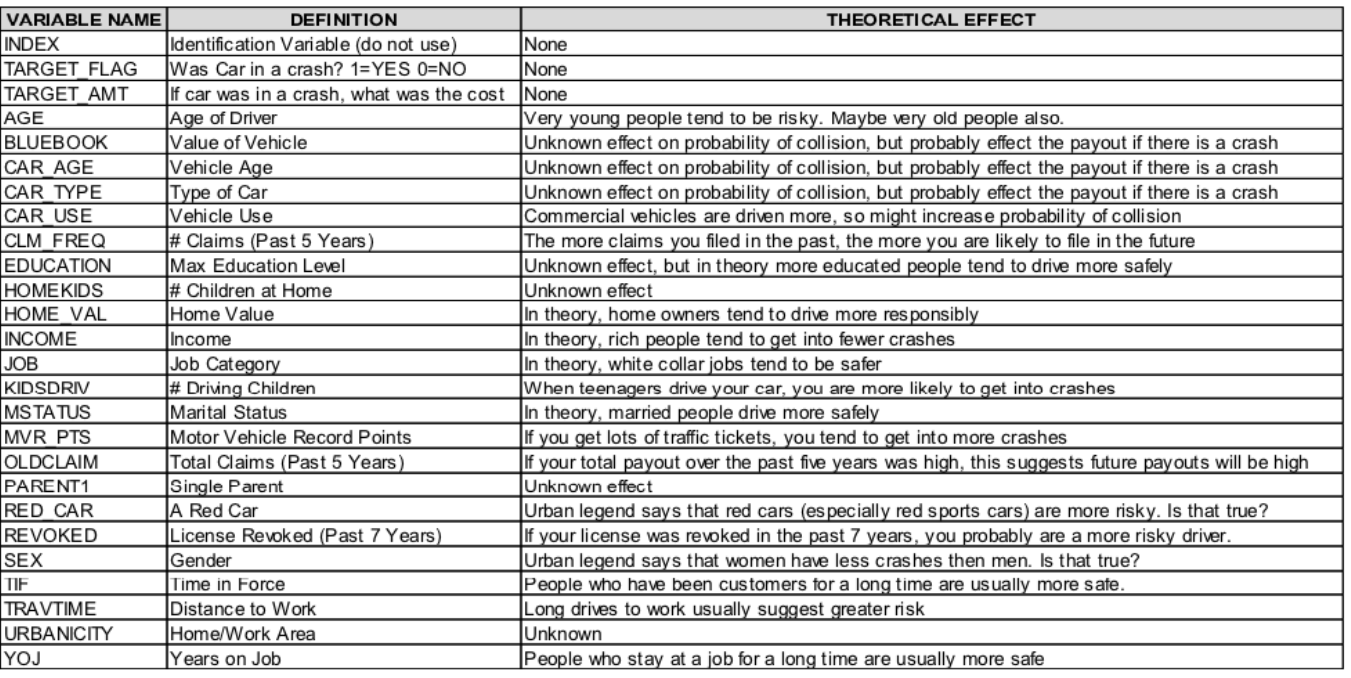

In [69]:
df.columns

Index(['ID', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1',
       'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG',
       'URBANICITY', 'Age Group'],
      dtype='object')

### CLAIM_FLAG

([<matplotlib.axis.XTick at 0x1d88b85c040>], [Text(-0.2, 0, '−0.2')])

<Figure size 720x720 with 0 Axes>

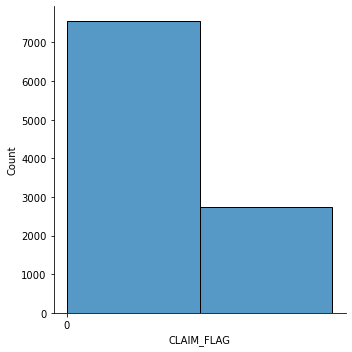

In [70]:
df['CLAIM_FLAG'].value_counts()

plt.figure(figsize=(10,10))

sns.displot(df['CLAIM_FLAG'], bins=2)


plt.xticks(np.arange(0,1,step=1))


### KIDSDRIV - Driving Children

In [71]:
df['KIDSDRIV'].value_counts() # số lượng trẻ em trong độ tuổi thanh thiếu niên sử dụng xe

0    9069
1     804
2     351
3      74
4       4
Name: KIDSDRIV, dtype: int64

Age has the max value is 85 => the customer for this age has the challenge to drive car and the percentage of having accident in this age may be higher than other

Text(0.5, 1.0, 'Distribution by Driving Children')

<Figure size 720x720 with 0 Axes>

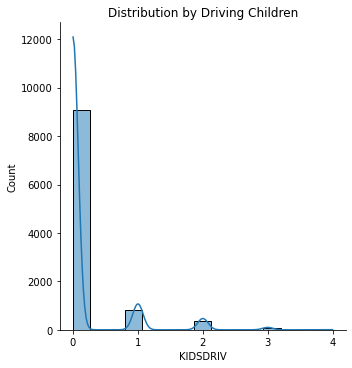

In [72]:
plt.figure(figsize=(10,10))

sns.displot(df['KIDSDRIV'], kde=True)

plt.xticks(np.arange(0,5,step=1))

plt.title('Distribution by Driving Children')

The number of customer has children who use their car to drive almost in 0,1,2 teenager. Suppose that family who has children drive car will have more intention to use insurance.

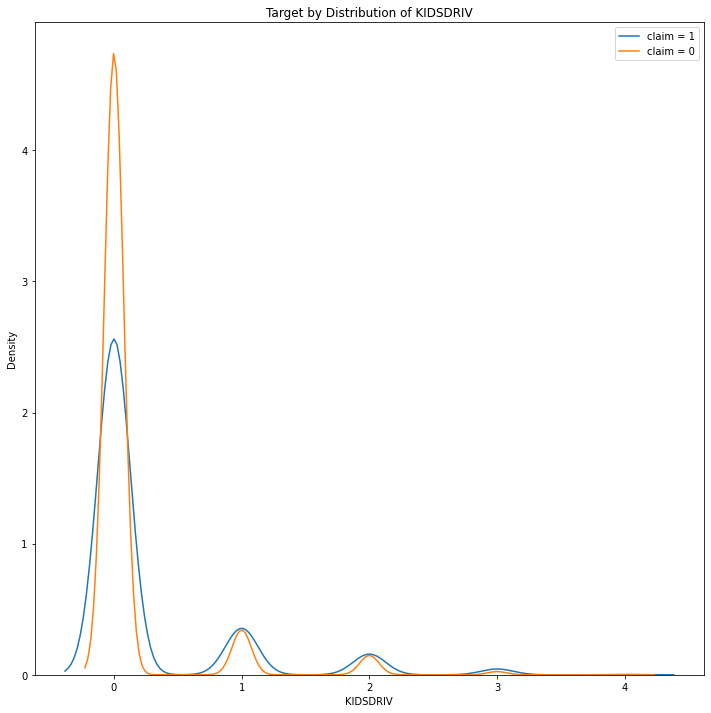

In [73]:
# Create distribution by driving children
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df.loc[df['CLAIM_FLAG'] == 1, 'KIDSDRIV'], label='claim = 1')

sns.kdeplot(df.loc[df['CLAIM_FLAG'] == 0, 'KIDSDRIV'], label='claim = 0')

plt.title('Target by Distribution of KIDSDRIV')
plt.xlabel('KIDSDRIV')
plt.ylabel('Density')
plt.legend()

In this graph we can clarify that customer who has children drive car (1,2,3) has the same amount using car insurance (the density of claim 1 and 0 is the same in the __KIDSDRIV__ value like 1,2,3)

On the other hand, when customer who has children don't use their car driving, the density of no buying insurance has more than 2 times who buying the car insurance.

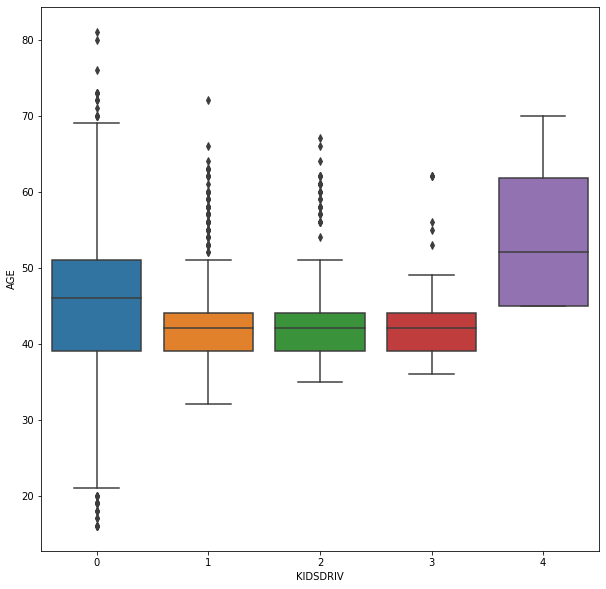

In [150]:
plt.figure(figsize=(10,10))

sns.boxplot(data=df, y='AGE', x='KIDSDRIV')

plt.show()

Customers who have kids (teenagers) driving their cars is range from above 30 to about 50 years old


### Age

In [151]:
df['AGE'].describe()

count    10302.000000
mean        44.835096
std          8.605101
min         16.000000
25%         39.000000
50%         45.000000
75%         51.000000
max         81.000000
Name: AGE, dtype: float64

In this description we see some outliers may not suit the law in some country. Example the min age is 16 (in Vietnam this age mustn't drive a car because they don't have a car licensed).

We also consider the max age when 81 should focus more analyse

Text(0.5, 1.0, 'Distribution by AGE')

<Figure size 720x720 with 0 Axes>

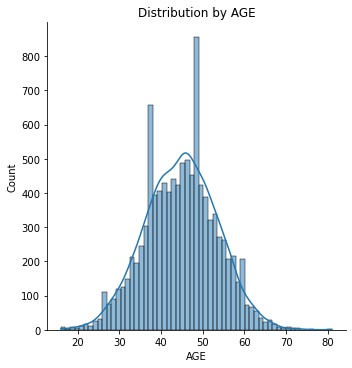

In [152]:
plt.figure(figsize=(10,10))

sns.displot(df['AGE'], kde=True)

plt.title('Distribution by AGE')


In [153]:
print('The skewness of distribution: %s' %df['AGE'].skew()) # lệch trái và khá ít => không dùng log được
print('The variance of distribution: %s' %df['AGE'].var()) # variance khá lớn

The skewness of distribution: -0.03400090449618839
The variance of distribution: 74.04776489500455


In [154]:
# Create a bin to have a more vision in this age
df['Age Group'] = pd.cut(df['AGE'], bins=np.linspace(15,85,15))
df['Age Group'].value_counts()

(45.0, 50.0]    2228
(40.0, 45.0]    2186
(35.0, 40.0]    1763
(50.0, 55.0]    1584
(30.0, 35.0]     928
(55.0, 60.0]     770
(25.0, 30.0]     396
(60.0, 65.0]     251
(20.0, 25.0]      98
(65.0, 70.0]      64
(15.0, 20.0]      22
(70.0, 75.0]       9
(75.0, 80.0]       2
(80.0, 85.0]       1
Name: Age Group, dtype: int64

We can see this distribution when age from 75 to 85 we can remove this age for ensure and the age must >= 18

In [155]:
# Create a new table
age_table = df[['AGE', 'Age Group','CLAIM_FLAG']]
age_table

,AGE,Age Group,CLAIM_FLAG
0,60.0,"(55.0, 60.0]",0
1,43.0,"(40.0, 45.0]",0
2,48.0,"(45.0, 50.0]",0
3,35.0,"(30.0, 35.0]",0
4,51.0,"(50.0, 55.0]",0
...,...,...,...
10297,45.0,"(40.0, 45.0]",0
10298,46.0,"(45.0, 50.0]",0
10299,48.0,"(45.0, 50.0]",0
10300,50.0,"(45.0, 50.0]",0


In [156]:
# Group by
age_group = age_table.groupby('Age Group').mean().sort_values('CLAIM_FLAG', ascending=False)
age_group

,AGE,CLAIM_FLAG
Age Group,,
"(20.0, 25.0]",23.489796,0.663265
"(15.0, 20.0]",18.181818,0.590909
"(75.0, 80.0]",78.000000,0.500000
"(70.0, 75.0]",72.333333,0.444444
"(25.0, 30.0]",28.431818,0.406566
"(30.0, 35.0]",33.310345,0.343750
"(60.0, 65.0]",62.466135,0.326693
"(35.0, 40.0]",38.165731,0.311401
"(55.0, 60.0]",57.584416,0.303896


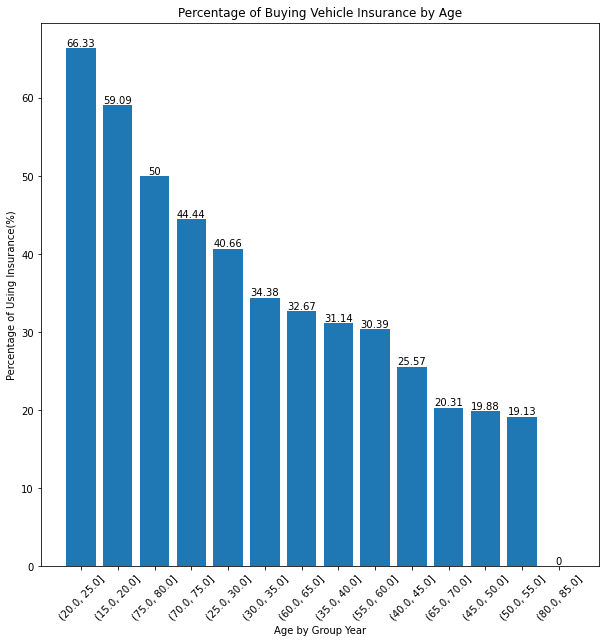

In [157]:
# Create percentage
fig, ax = plt.subplots(figsize=(10,10))

bar_age = plt.bar(age_group.index.astype(str), round(100 * age_group['CLAIM_FLAG'],2))

plt.xticks(rotation=45)
plt.xlabel('Age by Group Year')
plt.ylabel('Percentage of Using Insurance(%)')

plt.title('Percentage of Buying Vehicle Insurance by Age')

ax.bar_label(bar_age)

plt.show(bar_age)

`Information`:
- First, in this chart and chart before, I will remove the age > 80 because this age group just has 1 observaition => small  percentage in this dataset.
- Second, reference in Vietnamese law, people who under 18 don't have car licensed so I will remove who has under 18.

- This age has more intention to use car insurance spread in younger or older age (from 15-25 or 70-75) in percentage


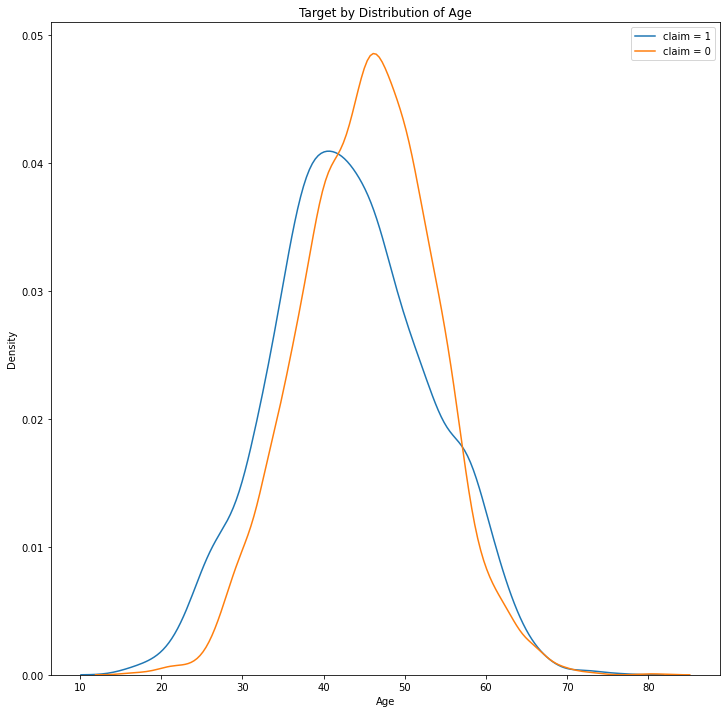

In [158]:
# Create distribution by age
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df.loc[df['CLAIM_FLAG'] == 1, 'AGE'], label='claim = 1')

sns.kdeplot(df.loc[df['CLAIM_FLAG'] == 0, 'AGE'], label='claim = 0')

plt.title('Target by Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

As the kde plot we can see something

1. Age group has buy car insurance more about 30-50 + age group has largest observations

### Income - Home value - claim flag

In this phase, we will clarify the relations the income and home value and we will figure out the assumption like:

1. Will the income has the positive effect to claim flag

2. Will customer who has house (home value >0) has intention to buy car insurance or vice versa

<AxesSubplot:xlabel='INCOME', ylabel='HOME_VAL'>

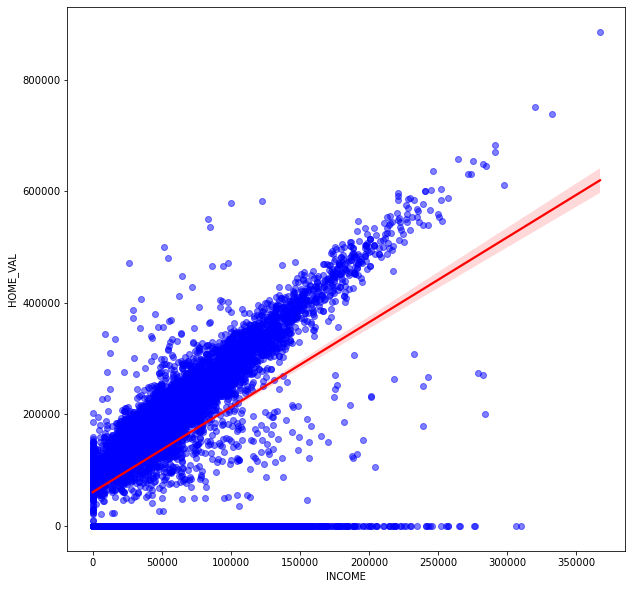

In [159]:
plt.figure(figsize=(10,10))

sns.regplot(data=df, x="INCOME", y='HOME_VAL',
            scatter_kws={'color':'blue', 'alpha':0.5},
            line_kws={'color':'red'})

<Figure size 720x720 with 0 Axes>

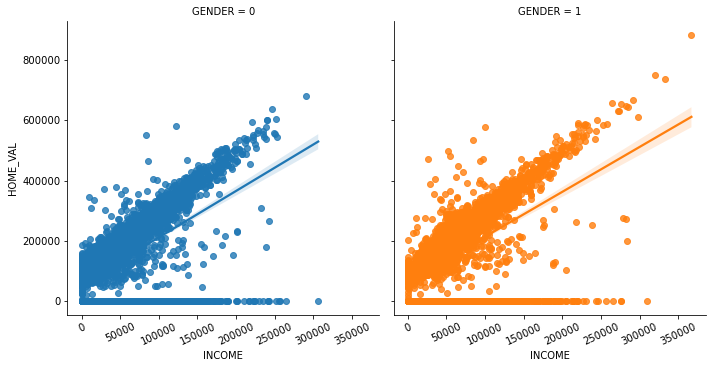

In [160]:
plt.figure(figsize=(10,10))

income = sns.lmplot(data=df, x="INCOME", y='HOME_VAL', col='GENDER', hue='GENDER')

# Rotate x-axis labels
for ax in income.axes[0]:
    ax.tick_params(axis='x', labelrotation=25)

plt.show()

Except customer who doesn't own house, the relationship about __INCOME__ and __HOME VALUE__ are positive.

In gender it still remain the positive relationship in both, so we can conclude that the relationship between income and home value is still positive in both gender.

And now, we want to figure out more than detail about home value and claim flag and income relationship, with customer who doesn't has a home (home value equals 0) compare with who has - who has more intention to buy car insurance. 

Next, with the higher income, may have a higher percentage to buy a car_insurance, or which range of income who has buy most.



In [161]:
df_home_val_1 = df[['GENDER','HOME_VAL', 'INCOME', 'CLAIM_FLAG']].copy()
df_home_val_1['FLAG_OWN_HOME'] = np.where(df_home_val_1['HOME_VAL'] == 0, '0', '1')
df_home_val_1['FLAG_OWN_HOME'] = df_home_val_1['FLAG_OWN_HOME'].astype(int)

Percentage of who doesn't has a house is round 28% (Customer who doesn't own a house may be a travelers or who a work in transit a lot, ...)

So we need to figure out in these kind of customers 

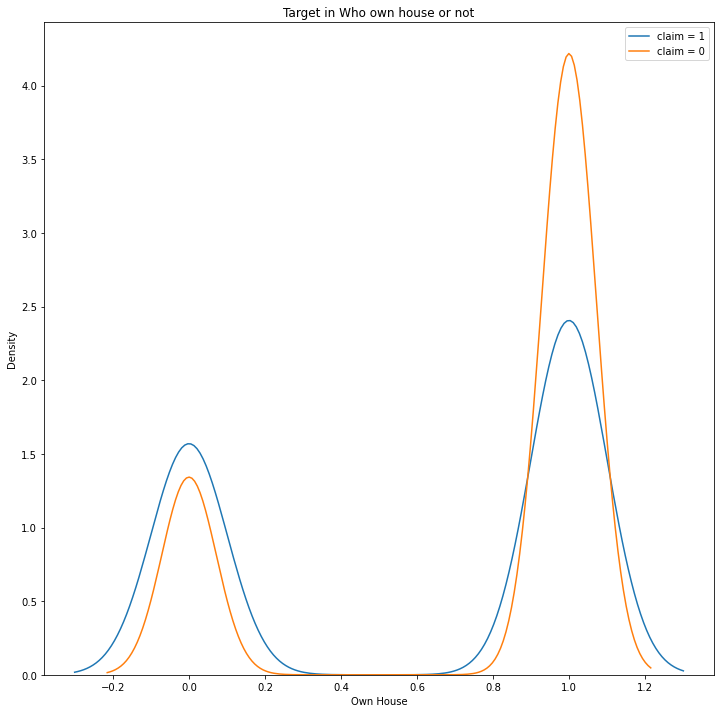

In [162]:
# Create distribution by Home_val
plt.figure(figsize=(12,12))

# Draw a kde for distribution age and response

sns.kdeplot(df_home_val_1.loc[df_home_val_1['CLAIM_FLAG'] == 1, 'FLAG_OWN_HOME'], label='claim = 1')

sns.kdeplot(df_home_val_1.loc[df_home_val_1['CLAIM_FLAG'] == 0, 'FLAG_OWN_HOME'], label='claim = 0')

plt.title('Target in Who own house or not')
plt.xlabel('Own House')
plt.ylabel('Density')
plt.legend()

Customer who doesn't has a house has more intention to buy car insurance.

Customer who doesn't has income, we can give 2 assumptions

1. Value in this dataset has a mistakes

2. They actually are in unemployment. However this actually has some problem when we find out in some detail, like why they also buy car insurance, how long are they in unemployment, because some of them also have kids, previous claim or buying car insurance. Analyze them may face the challenge make the model prediction not true. So we need to clarify should we keep this kind of customer or remove them.

In [163]:
df[df['INCOME'] == 0] 

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,Age Group
18,588888550,0,45.0,0,0.000000,0.0,0,106859.0,1,0,...,0,0.0,0,0,3,2920.0,5.000000,1,1,"(40.0, 45.0]"
28,254362485,2,44.0,2,0.000000,0.0,0,82344.0,1,0,...,0,3338.0,3,0,0,0.0,11.000000,0,1,"(40.0, 45.0]"
42,364483168,0,56.0,0,0.000000,0.0,0,63827.0,1,0,...,0,0.0,0,0,0,0.0,12.000000,0,0,"(55.0, 60.0]"
48,70821537,0,52.0,0,0.000000,0.0,0,87925.0,0,0,...,0,0.0,0,0,1,0.0,6.000000,0,0,"(50.0, 55.0]"
87,421217157,0,48.0,0,0.000000,0.0,0,98920.0,1,0,...,0,8363.0,2,0,3,0.0,7.743842,0,1,"(45.0, 50.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,224170926,0,41.0,3,0.000000,0.0,0,0.0,1,0,...,0,2633.0,2,0,5,0.0,5.000000,0,0,"(40.0, 45.0]"
10210,798630672,0,35.0,0,0.000000,0.0,0,88575.0,0,0,...,0,21099.0,3,1,1,0.0,9.000000,0,0,"(30.0, 35.0]"
10217,384021681,0,45.0,3,0.000000,0.0,0,65359.0,1,0,...,0,0.0,0,0,1,4858.0,1.000000,1,0,"(40.0, 45.0]"
10264,903596056,0,43.0,0,6.848858,0.0,0,55203.0,1,0,...,0,3035.0,4,0,0,471.0,14.000000,1,1,"(40.0, 45.0]"


### Time go to work and customer use or not use their car

This section we will figure out customer who need to go far to work may be face more risk in car driving => this affect their behaviour to buy car insurance

And we will separate 2 types of using car (private and commercial) will affect them

In [165]:
df['TRAVTIME'].value_counts()

5      427
32     288
35     271
33     268
36     266
      ... 
142      1
124      1
93       1
113      1
101      1
Name: TRAVTIME, Length: 100, dtype: int64

### Fix Data Value

In [166]:
train_df['Driving_License'].value_counts() # oke => imbalance data 

NameError: name 'train_df' is not defined

`Region_Code:`Unique code for the region of the customer

In [ ]:
len(train_df['Region_Code'].unique())

# Has 53 unique values => 53 region

: 

In [ ]:
train_df['Previously_Insured'].value_counts()

: 

In [ ]:
train_df['Vehicle_Age'].value_counts() 
# Can use one-hot encoder for this


: 

In [ ]:
train_df['Vehicle_Damage'].value_counts()

# Rename yes and no to 1 and 0 

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].replace({'Yes': 1, 'No':0})

: 

In [ ]:
train_df['Gender'] = train_df['Gender'].replace({'Male': 1, 'Female': 0})

: 

Male - 1

Female - 0

In [ ]:
len(train_df['Policy_Sales_Channel'].unique()) # 155 channels to reach customers

: 

In [ ]:
train_df.head(15)

: 

In [ ]:
age_of_car = train_df['Vehicle_Age']
age_of_car = pd.get_dummies(age_of_car,prefix='Vehicle_Age')


: 

In [ ]:
train_df = train_df.join(age_of_car)


: 

In [ ]:
train_df = train_df.drop(columns=['Vehicle_Age'])

: 

In [ ]:
train_df

: 

# Correlation


In [ ]:
train_df.columns

: 

In [ ]:
correlation_1 = train_df[['Age', 'Annual_Premium', 'Vintage', 'Gender', 'Previously_Insured', 'Vehicle_Damage','Policy_Sales_Channel', 'Response']].corr()
sns.heatmap(correlation_1, annot=True)

: 

As we can see the correlation of ('Age, Previous_Insure, Vehicle_Damage, Policy_Channel) has the strong positive than others. 

Assume using this feature for predict about buying Vehicle Insurance (we can remove vintage in the dataset because the correlation is too low)

### Gender and Vehicle Damage and Response

#### Gender and Response


In [ ]:
response_by_gender = train_df.groupby(['Gender', 'Response'])['id'].count().to_frame().reset_index()
response_by_gender

: 

In [ ]:
sns.catplot(x='Gender', y='id', col='Response', data=response_by_gender, kind='bar')




: 

Male has more intention to buy car insurance. However, the percentage of buying in each gender is not absolutely true because male also intend not buying vehicle insurance

#### Vehicle_Damage and Intention Buying Car Insurance

In [ ]:
vehicle_damage_response = train_df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().reset_index()
vehicle_damage_response

: 

In [ ]:
plt.figure(figsize=(10,10))

sns.catplot(x='Vehicle_Damage', y='id', col='Response', data=vehicle_damage_response, kind='bar')


: 

: 

: 

: 

: 

: 

: 

: 